In [77]:
import matplotlib.pyplot as plt

from aidam.math_utils import moving_function_rev1
from aidam.data_tr_vd_ts_partition import get_training_validation_test_indices

import pickle as pkl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler, StandardScaler

## Lettura dati

In [78]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 102
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-06-04T17:00:00


## Selezione dati e formazione dataset

In [79]:
regione='Italia'
var_indip=['terapia_intensiva','nuovi_positivi']
var_dip='deceduti_giornalieri'

In [80]:
temp=[]
for vi in var_indip:
    temp.append(trend[vi][regione])

data=np.vstack(tuple(temp)).T

### Divisione dati tr-ts

In [81]:
indici=get_training_validation_test_indices(data.shape[0],[0.7,0,0.3])

data_tr=data[indici[0],:]
data_ts=data[indici[2],:]

target_tr=(trend[var_dip][regione])[indici[0]]
target_ts=(trend[var_dip][regione])[indici[2]]


### Scaling

In [82]:
scaler=StandardScaler()
scaler.fit(data_tr)

data_trn=scaler.transform(data_tr)
data_tsn=scaler.transform(data_ts)

## Modellino

In [83]:
lr_model=LinearRegression()

lr_model.fit(data_trn,target_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predizioni

In [84]:
pred_tr=lr_model.predict(data_trn)
pred_ts=lr_model.predict(data_tsn)

print('Errore medio TR: %.2f'%np.mean(np.abs(pred_tr-target_tr)))
print('Errore medio TS: %.2f'%np.mean(np.abs(pred_ts-target_ts)))

Errore medio TR: 48.28
Errore medio TS: 40.88


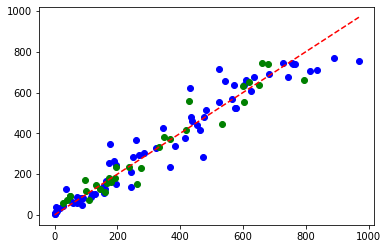

In [85]:
newx=np.linspace(0,max(trend[var_dip][regione])).reshape(-1,1)

fig,ax=plt.subplots(1)
ax.plot(target_tr,pred_tr,'bo',label='Training')
ax.plot(target_ts,pred_ts,'go',label='Test')
ax.plot(newx,newx,'r--')